In [1]:
import pandas as pd
import numpy as np
from functions import abbreviate_positions, remove_outliers


In [2]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\final_data.csv\\final_data.csv")
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

# Data Cleaning and Wrangling

- Verifying the missing values

In [4]:
#verify the missing values
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

- Round every numerical value to 2 decimal number

In [5]:
#round everything to 2 decimal places
df = df.round(2)

- Removing unnecessary columns

In [6]:
#remove player, position_encoded andwinger columns
df = df.drop(['player', 'position_encoded', 'winger'], axis=1)


In [7]:
df.head(1)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.01,0.0,0.0,1.22,0.34,9390,42,5,13,15000000,70000000


- Mapping positions

In [8]:
#position unique values
df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [9]:
# Apply the function to the 'position' column
df['position'] = df['position'].apply(abbreviate_positions)

In [10]:
df.sample(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
4557,CF América,Álex Zendejas,ATT,165.0,25.0,71,0.37,0.11,0.19,0.02,0.0,0.0,0.0,5110,362,43,2,5000000,5000000
6777,Orlando City SC,Mauricio Pereyra,MF,170.0,33.0,15,0.00,0.18,0.18,0.00,0.0,0.0,0.0,1025,93,18,3,1800000,7000000


- Convert age column to integer

In [11]:
#pass age to int
df['age'] = df['age'].astype(int)

In [12]:
df.head(1)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,GK,189.0,32,104,0.0,0.0,0.01,0.0,0.0,1.22,0.34,9390,42,5,13,15000000,70000000


- Convert categorical variables to numerical

*This will allow the model to understand and process categorical data.* 



Label Enconding - it suits better ordinal categories like 'team' and 'name'

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode 'team', 'name', and 'position' using LabelEncoder
le_team = LabelEncoder()
le_name = LabelEncoder()
le_position = LabelEncoder()

# Apply label encoding
df['team_encoded'] = le_team.fit_transform(df['team'])
df['name_encoded'] = le_name.fit_transform(df['name'])
df['position_encoded'] = le_position.fit_transform(df['position'])

# Drop original categorical columns
df = df.drop(columns=['team', 'name', 'position'])

In [14]:
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,team_encoded,name_encoded,position_encoded
0,189.00,32,104,0.00,0.00,0.01,0.0,0.0,1.22,0.34,9390,42,5,13,15000000,70000000,226,2088,2
1,196.00,30,15,0.00,0.00,0.07,0.0,0.0,1.24,0.21,1304,510,58,1,1500000,22000000,226,4066,2
2,188.00,37,4,0.00,0.00,0.00,0.0,0.0,0.62,0.92,292,697,84,4,600000,6000000,226,9692,2
3,175.00,25,82,0.03,0.06,0.22,0.0,0.0,0.00,0.00,6408,175,22,9,50000000,50000000,226,5758,1
4,191.00,30,63,0.02,0.02,0.05,0.0,0.0,0.00,0.00,5031,238,51,21,40000000,80000000,226,8092,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.24,20,16,0.18,0.09,0.26,0.0,0.0,0.00,0.00,1023,0,0,0,75000,75000,365,257,0
10750,190.00,24,26,0.37,0.19,0.19,0.0,0.0,0.00,0.00,1449,102,18,0,300000,300000,365,5535,0
10751,181.24,19,20,0.38,0.00,0.19,0.0,0.0,0.00,0.00,960,0,0,0,50000,50000,365,7272,0
10752,181.24,20,17,0.31,0.10,0.00,0.0,0.1,0.00,0.00,865,0,0,0,50000,50000,365,10443,0


**Position Encode**: 
- GK: 2
- DF: 1
- MF: 3
- ATT: 0

# Feature Engineering

Creation of a new feature: *awards per appearance*

In [15]:
# Create the 'awards_per_appearance' feature
df['awards_per_appearance'] = df['award'] / df['appearance']

# Handle potential infinities and NaNs from division by zero
df.replace([float('inf'), -float('inf')], 0, inplace=True)
df.fillna(0, inplace=True)

In [16]:
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,team_encoded,name_encoded,position_encoded,awards_per_appearance
0,189.00,32,104,0.00,0.00,0.01,0.0,0.0,1.22,0.34,9390,42,5,13,15000000,70000000,226,2088,2,0.125000
1,196.00,30,15,0.00,0.00,0.07,0.0,0.0,1.24,0.21,1304,510,58,1,1500000,22000000,226,4066,2,0.066667
2,188.00,37,4,0.00,0.00,0.00,0.0,0.0,0.62,0.92,292,697,84,4,600000,6000000,226,9692,2,1.000000
3,175.00,25,82,0.03,0.06,0.22,0.0,0.0,0.00,0.00,6408,175,22,9,50000000,50000000,226,5758,1,0.109756
4,191.00,30,63,0.02,0.02,0.05,0.0,0.0,0.00,0.00,5031,238,51,21,40000000,80000000,226,8092,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.24,20,16,0.18,0.09,0.26,0.0,0.0,0.00,0.00,1023,0,0,0,75000,75000,365,257,0,0.000000
10750,190.00,24,26,0.37,0.19,0.19,0.0,0.0,0.00,0.00,1449,102,18,0,300000,300000,365,5535,0,0.000000
10751,181.24,19,20,0.38,0.00,0.19,0.0,0.0,0.00,0.00,960,0,0,0,50000,50000,365,7272,0,0.000000
10752,181.24,20,17,0.31,0.10,0.00,0.0,0.1,0.00,0.00,865,0,0,0,50000,50000,365,10443,0,0.000000


In [17]:
#round by two decimal places
df = df.round(2)

In [18]:
#check for missing values
df.isnull().sum()

height                   0
age                      0
appearance               0
goals                    0
assists                  0
yellow cards             0
second yellow cards      0
red cards                0
goals conceded           0
clean sheets             0
minutes played           0
days_injured             0
games_injured            0
award                    0
current_value            0
highest_value            0
team_encoded             0
name_encoded             0
position_encoded         0
awards_per_appearance    0
dtype: int64

### Feature Selection

- Identifying the most important features using a Correlation Matrix

Correlation with target variable 'current_value':
current_value            1.000000
highest_value            0.834553
minutes played           0.420542
appearance               0.419656
award                    0.300454
assists                  0.137799
games_injured            0.135654
goals                    0.121617
days_injured             0.107686
height                   0.040536
team_encoded             0.000014
red cards               -0.010399
clean sheets            -0.011683
yellow cards            -0.011770
second yellow cards     -0.014978
name_encoded            -0.015481
position_encoded        -0.017062
awards_per_appearance   -0.017221
age                     -0.050151
goals conceded          -0.063526
Name: current_value, dtype: float64


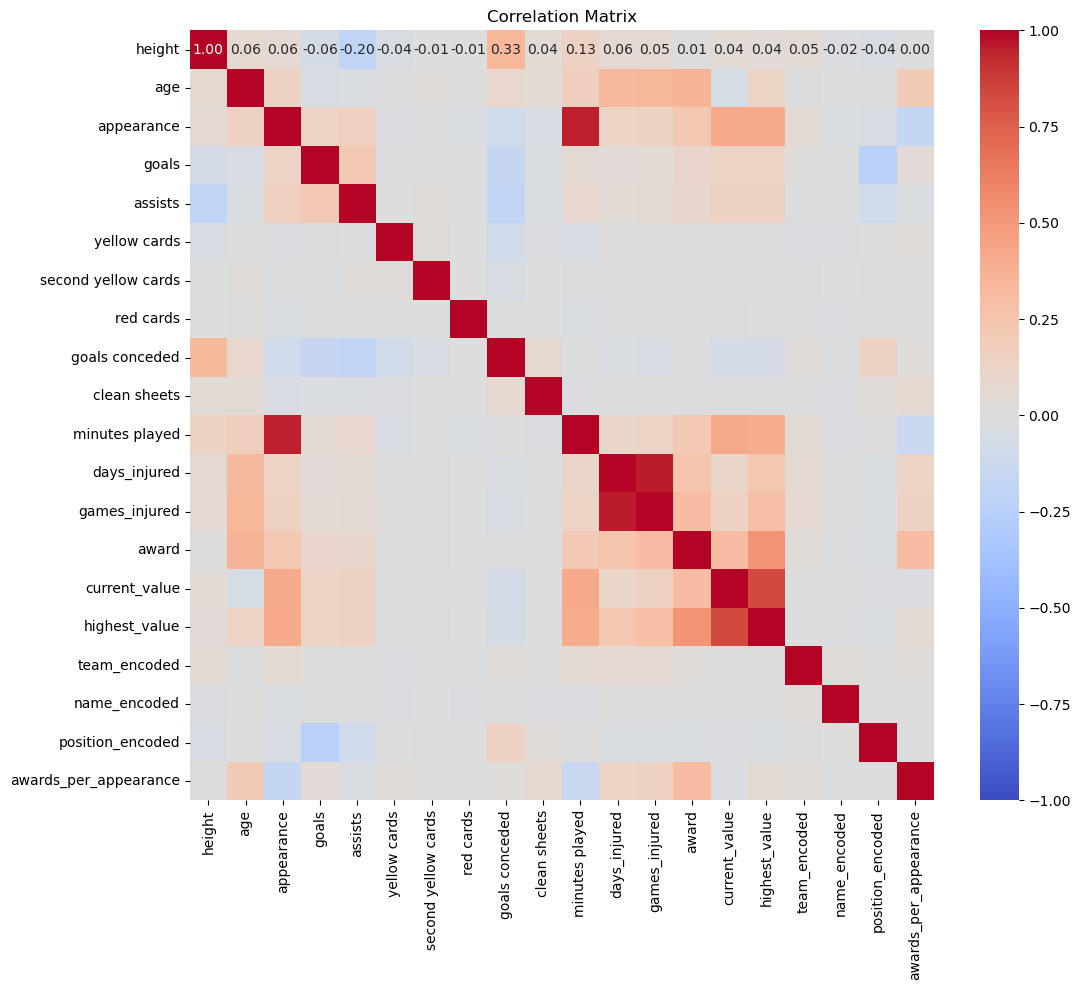

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlations with the target variable 'current_value'
corr_with_target = correlation_matrix['current_value'].sort_values(ascending=False)

# Print the correlations with the target variable
print("Correlation with target variable 'current_value':")
print(corr_with_target)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Based on the correlation analysis, we can select the top features for model training:

- highest_value
- minutes played
- appearance
- award
- assists
- games_injured
- goals
- days_injured

In [20]:
# Define the features (X) and target (y)
selected_features = ['highest_value', 'minutes played', 'appearance', 'award', 
                     'assists', 'games_injured', 'goals', 'days_injured']
X = df[selected_features]
y = df['current_value']

### Outliers Removal

In [21]:
# Apply outlier removal
columns_to_check = selected_features + ['current_value']
df_cleaned = remove_outliers(df, columns_to_check)

# Verify the size of the dataset before and after outlier removal
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_cleaned.shape}")

Original dataset size: (10754, 20)
Cleaned dataset size: (5669, 20)


### Normalize/Scale the Features

In [22]:
# Define the features (X) and target (y) without outliers
X_cleaned = df_cleaned[selected_features]
y_cleaned = df_cleaned['current_value']

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# Convert back to DataFrame for easier manipulation
X_scaled_cleaned = pd.DataFrame(X_scaled_cleaned, columns=selected_features)

In [23]:
X_scaled_cleaned

,highest_value,minutes played,appearance,award,assists,games_injured,goals,days_injured
0,0.535304,0.475262,0.243075,-0.652500,-0.682563,1.152102,-0.671094,0.286245
1,-0.252206,0.492358,0.456817,0.208539,0.148862,-0.593329,0.784055,-0.614300
2,-0.252206,0.904949,0.969797,0.208539,0.703145,-0.593329,1.007924,-0.614300
3,3.816594,-0.509485,0.243075,0.208539,0.564574,1.420630,-0.671094,1.110148
4,0.535304,2.247008,1.568274,-0.652500,-0.682563,-0.593329,-0.671094,-0.614300
...,...,...,...,...,...,...,...,...
5664,1.191562,0.134476,0.285823,-0.652500,2.227423,-0.593329,2.575008,-0.614300
5665,-0.645961,-0.191494,0.157578,-0.652500,-0.682563,-0.593329,1.903401,-0.614300
5666,-0.727993,-0.513474,-0.526395,-0.652500,0.564574,-0.593329,1.343728,-0.614300
5667,-0.744400,-0.603515,-0.483647,-0.652500,0.703145,-0.593329,2.798877,-0.614300


### Model Selection

In [27]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_scaled_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_cleaned, y_train_cleaned)
    
    # Predict on the test set
    y_pred = model.predict(X_test_cleaned)
    
    # Evaluate the model performance
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test_cleaned, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test_cleaned, y_pred)}")
    print(f"R2: {r2_score(y_test_cleaned, y_pred)}\n")

Linear Regression Performance:
MAE: 372121.3761803326
MSE: 309113371147.65704
R2: 0.4665065585314594

Decision Tree Performance:
MAE: 324399.05002405006
MSE: 392912397727.93066
R2: 0.3218792623519334

Random Forest Performance:
MAE: 253044.2679381206
MSE: 199726202037.8195
R2: 0.6552959890379526

Gradient Boosting Performance:
MAE: 249790.596486785
MSE: 181291712222.18344
R2: 0.6871117573981076

Support Vector Machine Performance:
MAE: 537013.3091682805
MSE: 656448417458.2251
R2: -0.13295301356950118



**Metrics Explanation**

- Mean Absolute Error (MAE): Indicates the average absolute difference between the predicted values and the actual values. Lower values are better.
- Mean Squared Error (MSE): Measures the average squared difference between the predicted values and the actual values. Lower values are better.
- R² Score: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values are better, with 1 being the best.

### Model Selection

Based on the evaluation metrics, the **Gradient Boosting Regressor** is the best performing model. It has the lowest MAE, indicating it has the smallest average error, and the highest R² score, suggesting it explains the largest proportion of variance in the target variable.

## Initial Model

### Initializing and Training Model

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train_cleaned, y_train_cleaned)

GradientBoostingRegressor(random_state=42)

### Predictions Making

In [29]:
# Predict on the test set
y_pred = gbr.predict(X_test_cleaned)

### Evaluation

In [30]:
# Evaluate the model performance
mae = mean_absolute_error(y_test_cleaned, y_pred)
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)

print(f"Initial Gradient Boosting Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

Initial Gradient Boosting Performance:
MAE: 249778.61953388352
MSE: 180733551216.36737
R2: 0.6880750778613434


## Tuning Model

### Hyperparameter tuning - Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train_cleaned, y_train_cleaned)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_cleaned)
best_mae = mean_absolute_error(y_test_cleaned, y_pred_best)
best_mse = mean_squared_error(y_test_cleaned, y_pred_best)
best_r2 = r2_score(y_test_cleaned, y_pred_best)

print(f"Best Gradient Boosting Performance:")
print(f"MAE: {best_mae}")
print(f"MSE: {best_mse}")
print(f"R2: {best_r2}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Performance:
MAE: 1582794.3179176743
MSE: 17262390440240.129
R2: 0.7721549500664563


**Best Parameters**:

- max_depth: 10
- max_features: 'auto'
- min_samples_leaf: 2
- min_samples_split: 2
- n_estimators: 300

These are the optimal hyperparameters found by Grid Search to improve the model's performance.

**Mean Absolute Error (MAE)**: 1,582,794.32

This indicates that, on average, the predictions made by the tuned Random Forest model deviate from the actual current_value by approximately 1,582,794 units. This is slightly better than the initial model's MAE (1,596,146.17), indicating a small improvement in prediction accuracy.

**Mean Squared Error (MSE)**: 17,262,390,440,240.13

This measures the average of the squares of the errors, which means it is more sensitive to outliers than MAE. The tuned model's MSE is slightly lower than the initial model's MSE (17,672,307,360,170.31), indicating a minor improvement in handling larger errors.

**R² Score**: 0.772

This indicates that the model explains approximately 77.2% of the variance in the current_value. The tuned model's R² score is slightly higher than the initial model's R² score (0.767), suggesting a small improvement in the model's ability to explain the variance in the target variable.

**Summary**:
The Grid Search hyperparameter tuning has resulted in a model with slightly better performance metrics compared to the initial model.
The improvement in MAE, MSE, and R², although minor, indicates that the hyperparameter tuning was successful in optimizing the model.

### Cross-Validation

In [42]:
from sklearn.model_selection import cross_val_score

# Cross-Validation Scores
cv_scores = cross_val_score(best_model, X_scaled_cleaned, y_cleaned, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Average Cross-Validation R2 Score: {cv_scores.mean()}")


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

Cross-Validation R2 Scores: [ 0.69093125  0.73826711  0.62284426  0.63879769 -0.90553509]
Average Cross-Validation R2 Score: 0.35706104327346055


*Average Cross-Validation R² Score*: **0.357**

### Feature Importance Analysis

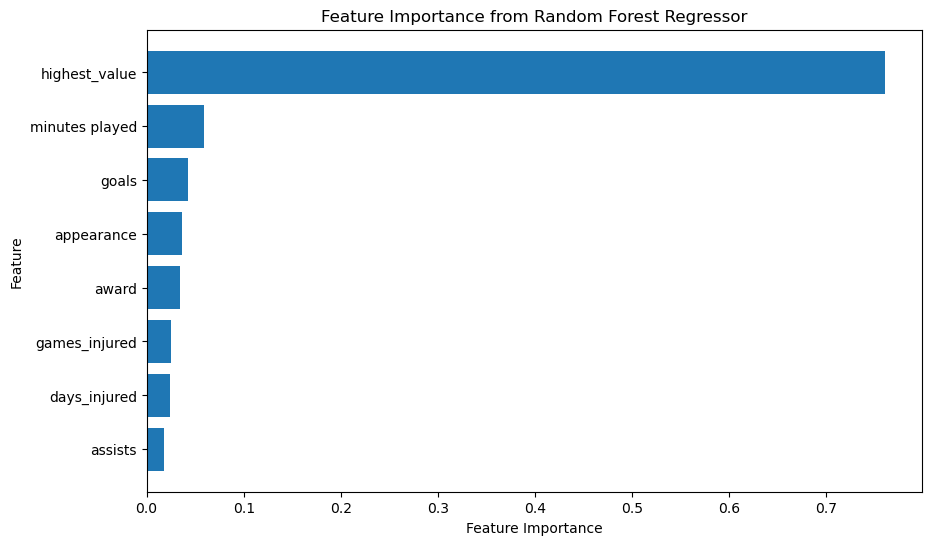

In [43]:
import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()